# Salary Prediction Project

## Problem Statement

InnovaTech, a leading company in the robotics industry, is now hiring! As the lead data scientist at the compnay, you have been tasked with creating an automated system that estimates annual salaries for conmpany employees based on information such as their age, gender, years of experience, education level, and job title.

Estimates from your system will be used by potential employees to help them decide whether InnovaTech is right for them. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.

You will be given a CSV file consisting of the aforementioned information and the actual salaries of over 300 employees.

## Getting the Data

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data/Salary Data.csv')
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


The dataset has 375 rows and 6 columns, with each row representing information a specific employee. Let's take a closer look at the employee information.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


The age and years of experience columns are numerical, and the gender, education level, and job title are strings (possible categories). There are no missing values in any of the columns.

Let's now look at some statistics for the numerical columns.

In [4]:
data.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


The values in all of the columns seem reasonable. The salary and years of experience columns look very skewed, as in both columns the median is much lower than the maxmimum value. 

The minimum value in the salaries column is 350, which doesn't look right. Let's take a closer look.

In [5]:
data.Salary.sort_values()

259       350.0
82      30000.0
97      35000.0
218     35000.0
49      35000.0
         ...   
105    220000.0
30     250000.0
83     250000.0
172         NaN
260         NaN
Name: Salary, Length: 375, dtype: float64

Based on this, we can see that one of the salary entries is 350, and 2 of the salary entries are not present. Let's get rid of these rows to prevent our model from becoming skewed.

In [6]:
data.dropna(inplace=True)
data.drop(index=259, inplace=True)
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [7]:
data.Salary.sort_values()

82      30000.0
189     35000.0
134     35000.0
153     35000.0
218     35000.0
         ...   
53     200000.0
4      200000.0
105    220000.0
83     250000.0
30     250000.0
Name: Salary, Length: 372, dtype: float64

Based on the new values, we successfully got rid of the faulty data values in the salary column. Now we can proceed with further data exploration and visualization.

## Exploratory Analysis and Visualization

In [8]:
%pip install plotly --quiet

Note: you may need to restart the kernel to use updated packages.


In [9]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

We will now add some setting that will improve the default style and font sizes for our charts.

In [10]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Age

Age is a numeric column. The minimum age in the dataset is 23 and the maximum age is 53. Thus, we can use plotly to visualize the distribution of age using a histogram with 30 bins (one for each year) and a box plot. 

In [11]:
data.Age.describe()

count    372.000000
mean      37.454301
std        7.065009
min       23.000000
25%       31.750000
50%       36.000000
75%       44.000000
max       53.000000
Name: Age, dtype: float64

In [12]:
fig = px.histogram(data, 
                   x='Age', 
                   marginal='box', 
                   nbins=30, 
                   title='Age Distribution')
fig.update_layout(bargap=0.1)
fig.show()

The age distribution in the dataset is mostly uniform except for the edges of the dataset, which could be because the company wants more experience (thereby hiring less young people) or because the older employees are retiring (which is why there are less old people). 

### Gender

Let's now visualize the distribution of gender, a categorical column, using a histogram.

In [13]:
data.Gender.value_counts()

Gender
Male      193
Female    179
Name: count, dtype: int64

In [14]:
px.histogram(data, 
             x='Gender', 
             title='Gender Distribution', 
             color_discrete_sequence=['purple'])

Based on this distribution, there is about an equal numbers of males and females working at this company based on the dataset. This is different from the US national average in that males are usually the majority of software engineers/data scientists; however, there are more positions than just those two in the dataset, which may have led to the distribution shown. 

### Education Level

Let's now visualize education level, another categorical column, using a histogram.

In [15]:
data['Education Level'].value_counts()

Education Level
Bachelor's    223
Master's       98
PhD            51
Name: count, dtype: int64

In [16]:
px.histogram(data, x='Education Level', title='Education Levels', color_discrete_sequence=['yellowgreen'])

Based on this distribution, over half of the workers have a Bachelor's degree, while the rest have a higher education, whether it be a Master's degree or PhD. Most jobs usually require only a Bachelor's, while more research intensive jobs require higher education, and there usually aren't many types of those jobs.

### Years of Experience

Let's now visualize the distribution of years of exeprience, a numerical column, using a histogram and box plot.

In [17]:
fig = px.histogram(data, 
                   x='Years of Experience', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of Years of Experience')
fig.update_layout(bargap=0.1)
fig.show()

This is a Gaussian distribution that is skewed right, which is typical, as there are less people that are more experienced.

### Salary

Finally, let's visualize the salaries of the employees; the salary column is the one we are trying to predict. We can also use the categorical column "gender" to distinguish the salaries for men and women.

In [18]:
fig = px.histogram(data, 
                   x='Salary', 
                   marginal='box', 
                   color='Gender', 
                   color_discrete_sequence=[ 'turquoise', '#CB0000'], 
                   title='Annual Employee Salaries')
fig.update_layout(bargap=0.1)
fig.show()

Based on this graph, we can make the following obersvations
* A majority of the employees are making money within $100,000 a year or a little bit lower than that, and only a small portion of employees are making well above 100k (greater than $150,000).
* There isn't a significant difference between men and women's salaries, as the median for women is 90k while the median for men is 100k; however, the maximum for men is much higher than the maximum for women.

Instead of using gender, let's use level of education to display employee salaries now.

In [19]:
fig = px.histogram(data, 
                   x='Salary', 
                   marginal='box', 
                   color='Education Level', 
                   color_discrete_sequence=['#46211A', '#A43820', "#F1D3B2"], 
                   title='Annual Employee Salaries')
fig.update_layout(bargap=0.1)
fig.show()

Based on this graph, we can observe that those with a PhD earn a much higher salary than those with Bachelor's or Master's, which is expected, and that most of the lower income jobs are held by those with just a Bachelor's Degree.

Now that we have looked at individual columns, let's now visualize the relationship between the salary column and other columns.

### Age and Salary

Let's visualize the relationship between age and salary using a scatter plot, where each point on the scatter plot would represent one employee. We'll also use values from the gender column to color the points.

In [20]:
fig = px.scatter(data, 
                 x='Age', 
                 y='Salary', 
                 color='Gender', 
                 opacity=0.8, 
                 hover_data=['Job Title'], 
                 title='Age vs. Salary')
fig.update_traces(marker_size=5)
fig.show()

Based on this scatter plot, we can observe that salary increases with progressing age, but there is significant variation at each age, which means that age isn't the only factor we can use to determine salary.

### Years of Experience and Salary

Let's now visualize the relationship between an employee's years of experience on the job and their salary using another scatter plot. Again, each point will represent a particular employee, and we will color the points based on gender.

In [21]:
fig = px.scatter(data, 
                 x='Years of Experience', 
                 y='Salary', 
                 color='Gender', 
                 opacity=0.8, 
                 hover_data=['Job Title'], 
                 title='Years of Experience vs. Salary')
fig.update_traces(marker_size=5)
fig.show()

Based on this scatter plot, we can observe that salary increases with years of experience, but as with age, there is significant variation at each year, which means that years of experience can't be the only factor used to determine salary.

### Correlations

Let's take a look at how each of the columns are correlated to each other with a correlation matrix; this will be a reference for our linear regression model later.

We should first look at the categorical columns, because they can't be apart of the correlation matrix. Let's begin with the gender column.

In [22]:
gender_values = {'Male': 1, 'Female': 0}
gender_numeric = data.Gender.map(gender_values)
data.Salary.corr(gender_numeric)

0.07702208472341511

Based on this value, there is an extremely weak positive correlation between gender and salary. Let's now look at education level.

In [23]:
education_values = {"Bachelor's": 0, "Master's": 1, "PhD": 2}
education_numeric = data["Education Level"].map(education_values)
data.Salary.corr(education_numeric)

0.6706272916052559

Based on this value, there is a relatively strong positive correlation between one's education level and their salary.

Now that we have looked at the necessary correlations for the categorical columns, let's now use a correlation matrix to view the correlations for the numerical columns.

In [24]:
numerical_df = data.drop(columns=['Gender', 'Education Level', 'Job Title'])
numerical_df

,Age,Years of Experience,Salary
0,32.0,5.0,90000.0
1,28.0,3.0,65000.0
2,45.0,15.0,150000.0
3,36.0,7.0,60000.0
4,52.0,20.0,200000.0
...,...,...,...
370,35.0,8.0,85000.0
371,43.0,19.0,170000.0
372,29.0,2.0,40000.0
373,34.0,7.0,90000.0


In [36]:
numerical_df.corr()

,Age,Years of Experience,Salary
Age,1.000000,0.979056,0.922801
Years of Experience,0.979056,1.000000,0.930594
Salary,0.922801,0.930594,1.000000


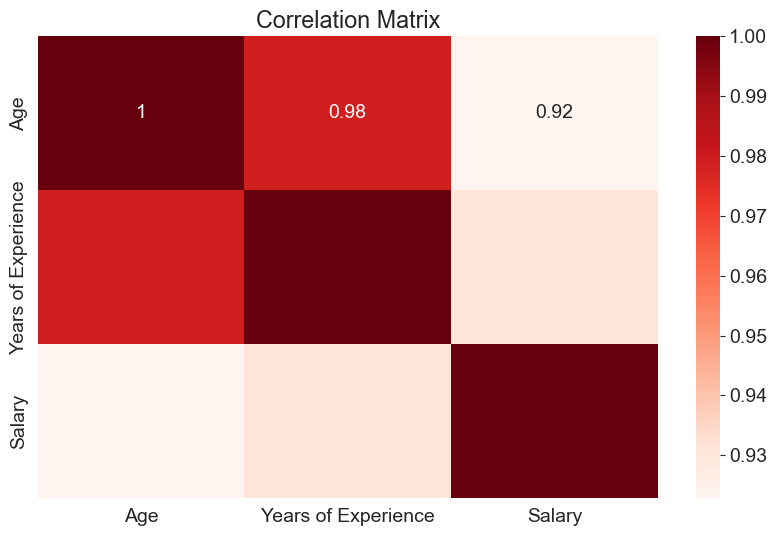

In [37]:
sns.heatmap(numerical_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');